# Metricas

In [ ]:
# Importar pandas
import pandas as pd

# Leer el archivo Excel
file_path = "results/metrics_results_per_fold.xlsx"
metrics_df_BaggedKNN = pd.read_excel(f'BaggedKNN/{file_path}', engine='openpyxl')
metrics_df_CatBoost = pd.read_excel(f'CatBoost/{file_path}', engine='openpyxl')
metrics_df_ElasticNet = pd.read_excel(f'ElasticNet/{file_path}', engine='openpyxl')
metrics_df_KernelRidge = pd.read_excel(f'KernelRidge/{file_path}', engine='openpyxl')
metrics_df_KNN = pd.read_excel(f'KNN/{file_path}', engine='openpyxl')
metrics_df_Lasso = pd.read_excel(f'Lasso/{file_path}', engine='openpyxl')
metrics_df_MLP = pd.read_excel(f'MLP/{file_path}', engine='openpyxl')
metrics_df_RandomForest = pd.read_excel(f'Random_Forest/{file_path}', engine='openpyxl')
metrics_df_SVR = pd.read_excel(f'SVR/{file_path}', engine='openpyxl')
metrics_df_XGBoost = pd.read_excel(f'XGBoost/{file_path}', engine='openpyxl')

In [5]:
metrics_df_CatBoost

,Fold,MAE,MAE_corrected,R2,R2_corrected
0,1,12.515581,7.159292,0.454070,0.817331
1,2,13.159642,6.914984,0.386044,0.822191
2,3,15.267294,8.782813,0.249931,0.755805
3,4,13.948194,7.256885,0.347241,0.800058
4,5,14.573856,7.585453,0.223926,0.776415
...,...,...,...,...,...
195,196,14.144579,7.326949,0.321023,0.791704
196,197,11.304165,6.138765,0.507540,0.850552
197,198,13.538264,6.559905,0.389371,0.838225
198,199,12.717271,6.869269,0.372697,0.802347


C:\Users\felip\AppData\Local\Temp\ipykernel_9436\1509345324.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(list(reversed(data.values())),


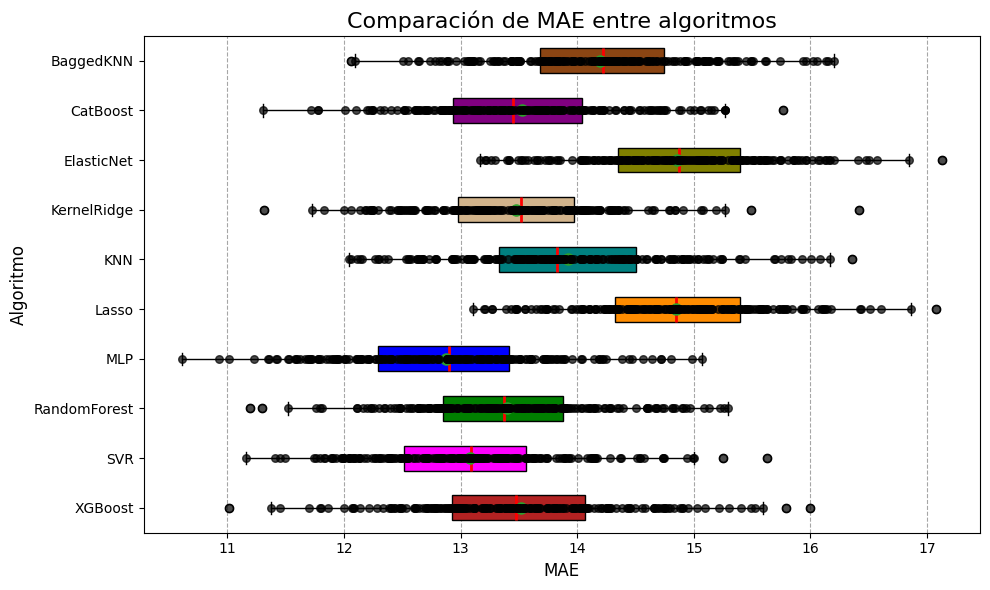

C:\Users\felip\AppData\Local\Temp\ipykernel_9436\1509345324.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(list(reversed(data.values())),


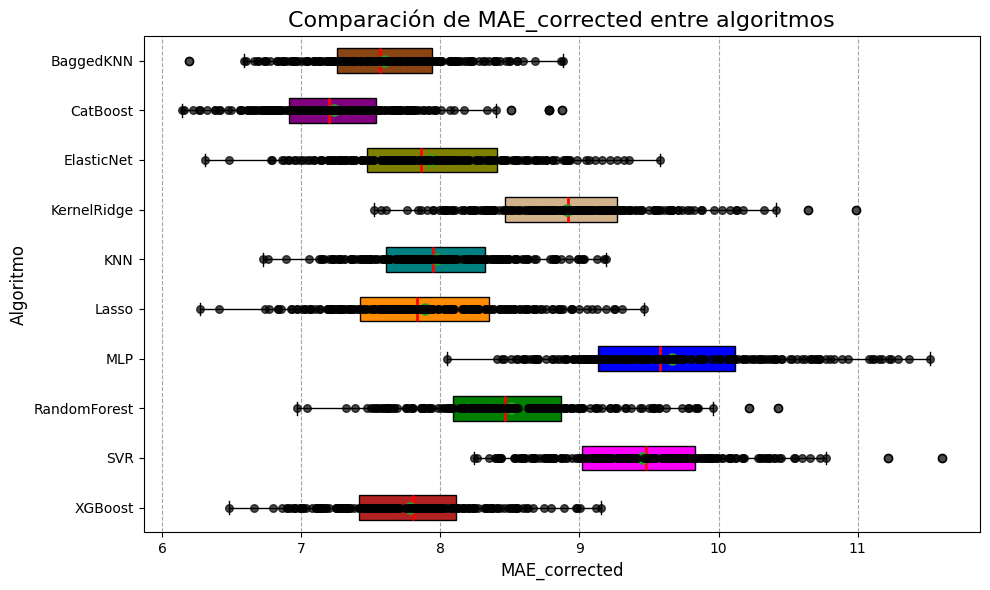

C:\Users\felip\AppData\Local\Temp\ipykernel_9436\1509345324.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(list(reversed(data.values())),


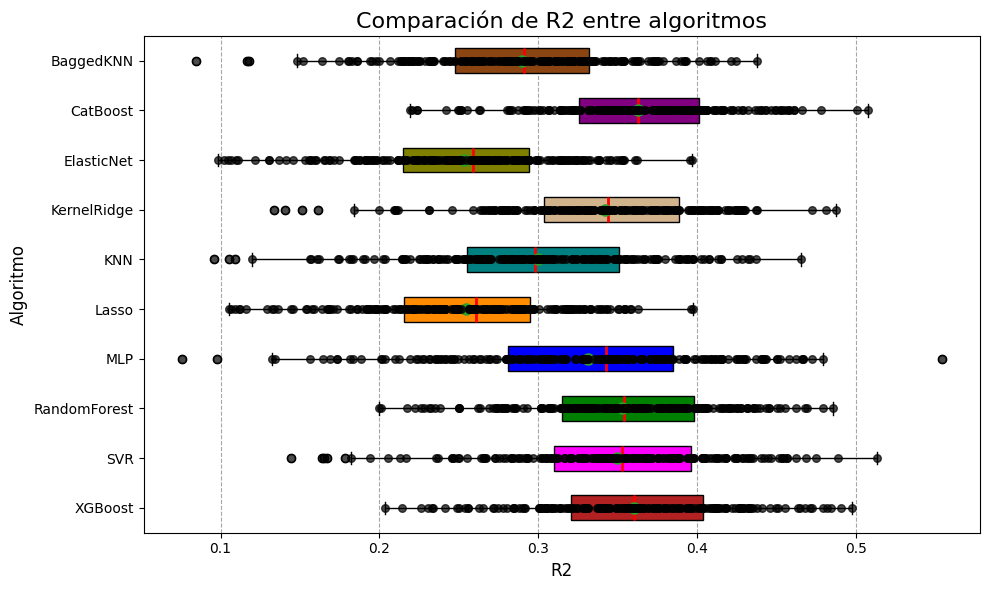

C:\Users\felip\AppData\Local\Temp\ipykernel_9436\1509345324.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(list(reversed(data.values())),


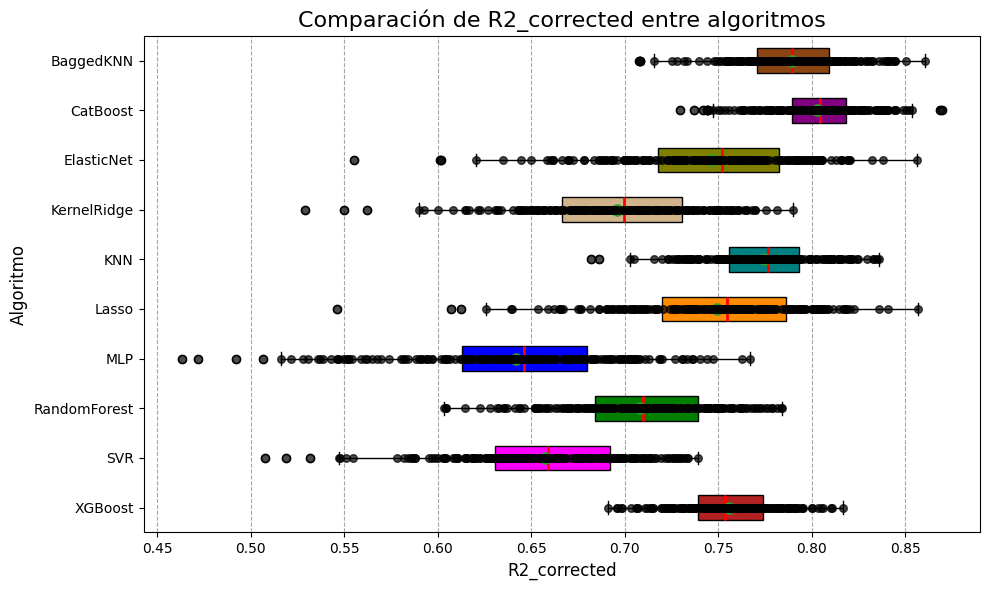

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear un diccionario con los DataFrames y sus nombres
metrics_dict = {
    "BaggedKNN": metrics_df_BaggedKNN,
    "CatBoost": metrics_df_CatBoost,
    "ElasticNet": metrics_df_ElasticNet,
    "KernelRidge": metrics_df_KernelRidge,
    "KNN": metrics_df_KNN,
    "Lasso": metrics_df_Lasso,
    "MLP": metrics_df_MLP,
    "RandomForest": metrics_df_RandomForest,
    "SVR": metrics_df_SVR,
    "XGBoost": metrics_df_XGBoost,
}

# Extraer las métricas en listas separadas por algoritmo
mae_data = {name: df["MAE"] for name, df in metrics_dict.items()}
mae_corrected_data = {name: df["MAE_corrected"] for name, df in metrics_dict.items()}
r2_data = {name: df["R2"] for name, df in metrics_dict.items()}
r2_corrected_data = {name: df["R2_corrected"] for name, df in metrics_dict.items()}

# Crear los boxplots
metrics_to_plot = {
    "MAE": mae_data,
    "MAE_corrected": mae_corrected_data,
    "R2": r2_data,
    "R2_corrected": r2_corrected_data,
}

# Diccionario de colores manuales para cada algoritmo
colores_algoritmos = {
    "BaggedKNN": "#8B4513",  # SaddleBrown
    "CatBoost": "#800080",    # Purple
    "ElasticNet": "#808000",  # Olive
    "KernelRidge": "#D2B48C", # Tan
    "KNN": "#008080",         # Teal
    "Lasso": "#FF8C00",       # DarkOrange
    "MLP": "#0000FF",         # Blue
    "RandomForest": "#008000",# Green
    "SVR": "#FF00FF",         # Magenta
    "XGBoost": "#B22222",     # Firebrick
}

# Configurar el fondo blanco manualmente
plt.rcParams['axes.facecolor'] = 'white'

# Generar los gráficos
for metric, data in metrics_to_plot.items():
    plt.figure(figsize=(10, 6))
    plt.gcf().set_facecolor('white')  # Fondo blanco manual
    
    # Crear el boxplot
    box = plt.boxplot(list(reversed(data.values())), 
                      labels=list(reversed(list(data.keys()))), 
                      vert=False, 
                      patch_artist=True, 
                      showmeans=True)
    
    # Personalizar cada caja con el color del diccionario
    for i, patch in enumerate(box['boxes']):
        algorithm_name = list(reversed(list(data.keys())))[i]
        patch.set_facecolor(colores_algoritmos.get(algorithm_name, "#7f7f7f"))  # Color predeterminado en caso de no encontrarlo
    
    # Personalizar la media en el boxplot
    for median in box['medians']:
        median.set(color='red', linewidth=2)  # Mediana en rojo
    for mean in box['means']:
        mean.set(marker='o', color='blue', markersize=8, linestyle='--')  # Media en azul

    # Agregar puntos individuales a los boxplots (distribución horizontal)
    for i, (name, values) in enumerate(data.items()):
        # Ajustamos los puntos en el eje x (valores de la métrica) y y (índice de algoritmo)
        # Invertimos el índice de algoritmo al agregar los puntos
        plt.scatter(values, [len(data) - i] * len(values), color='black', alpha=0.7, s=30, zorder=3)  # Zorder para asegurar que los puntos estén sobre los boxplots
    
    # Título y etiquetas
    plt.title(f"Comparación de {metric} entre algoritmos", fontsize=16)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel("Algoritmo", fontsize=12)
    
    # Agregar la grilla (en el eje X)
    plt.grid(axis="x", linestyle="--", alpha=0.7, color='gray')  # Grilla horizontal en el eje X
    
    plt.tight_layout()
    plt.show()


# Correlacion entre las predicciones

In [1]:
# Importar pandas
import pandas as pd

# Leer el archivo Excel
file_path = "results/df_CN_results.xlsx"
results_df_BaggedKNN = pd.read_excel(f'BaggedKNN/{file_path}', engine='openpyxl')
results_df_CatBoost = pd.read_excel(f'CatBoost/{file_path}', engine='openpyxl')
resultss_df_ElasticNet = pd.read_excel(f'ElasticNet/{file_path}', engine='openpyxl')
results_df_KernelRidge = pd.read_excel(f'KernelRidge/{file_path}', engine='openpyxl')
results_df_KNN = pd.read_excel(f'KNN/{file_path}', engine='openpyxl')
results_df_Lasso = pd.read_excel(f'Lasso/{file_path}', engine='openpyxl')
results_df_MLP = pd.read_excel(f'MLP/{file_path}', engine='openpyxl')
results_df_RandomForest = pd.read_excel(f'Random_Forest/{file_path}', engine='openpyxl')
results_df_SVR = pd.read_excel(f'SVR/{file_path}', engine='openpyxl')
results_df_XGBoost = pd.read_excel(f'XGBoost/{file_path}', engine='openpyxl')

In [2]:
results_df_BaggedKNN

,ID-unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_ID,Age,Sex,Educ,MMSE,HDI,GINI,ODQ
0,0,33.0,34.277473,24.441047,1.277473,-8.558953,CUB_123_2_sub-10001,33.0,1.0,19.0,30.0,0.7578,40.70,99.282421
1,1,57.0,33.142573,37.940291,-23.857427,-19.059709,CUB_123_2_sub-10004,57.0,2.0,13.0,NaN,0.7578,40.70,99.739738
2,2,32.0,58.025824,47.583754,26.025824,15.583754,CUB_123_2_sub-10005,32.0,1.0,10.0,NaN,0.7578,40.70,99.361739
3,3,21.0,36.279249,19.151799,15.279249,-1.848201,CUB_123_2_sub-10006,21.0,1.0,13.0,NaN,0.7578,40.70,99.561273
4,5,36.0,32.473626,24.461687,-3.526374,-11.538313,CUB_123_2_sub-10008,36.0,1.0,19.0,30.0,0.7578,40.70,99.374132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1379,57.0,64.792738,69.474945,7.792738,12.474945,CHI_TAK_sub-100017,57.0,2.0,17.0,30.0,0.8550,44.92,99.599221
1319,1380,48.0,60.019853,59.269833,12.019853,11.269833,CHI_TAK_sub-100018,48.0,2.0,17.0,28.0,0.8550,44.92,99.675799
1320,1381,57.0,60.075595,64.756089,3.075595,7.756089,CHI_TAK_sub-100019,57.0,2.0,17.0,29.0,0.8550,44.92,99.641446
1321,1382,69.0,46.498974,58.462349,-22.501026,-10.537651,CHI_TAK_sub-100020,69.0,2.0,12.0,30.0,0.8550,44.92,98.420503



Matriz de correlación para y_pred:

              BaggedKNN  CatBoost  ElasticNet  KernelRidge       KNN  \
BaggedKNN      1.000000  0.901572    0.772970     0.873525  0.955496   
CatBoost       0.901572  1.000000    0.795697     0.879416  0.905953   
ElasticNet     0.772970  0.795697    1.000000     0.822075  0.748563   
KernelRidge    0.873525  0.879416    0.822075     1.000000  0.851916   
KNN            0.955496  0.905953    0.748563     0.851916  1.000000   
Lasso          0.775666  0.797029    0.999324     0.823994  0.750829   
MLP            0.815322  0.850003    0.791545     0.888755  0.810610   
RandomForest   0.887290  0.980084    0.776262     0.872248  0.890379   
SVR            0.907266  0.916937    0.801082     0.948968  0.887615   
XGBoost        0.888447  0.981105    0.782421     0.885306  0.894923   

                 Lasso       MLP  RandomForest       SVR   XGBoost  
BaggedKNN     0.775666  0.815322      0.887290  0.907266  0.888447  
CatBoost      0.797029  0.850003

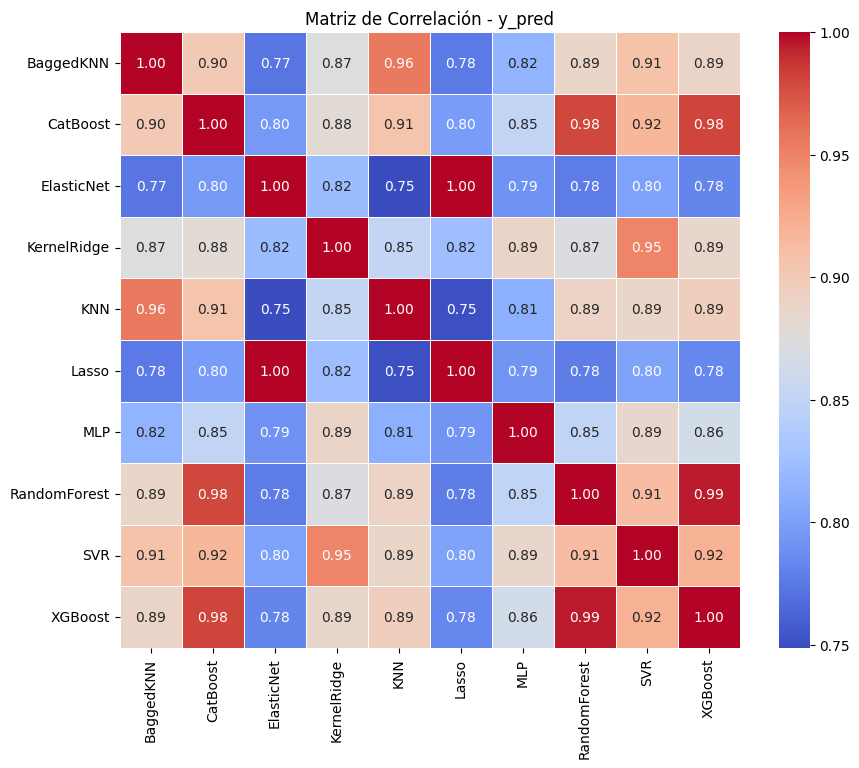


Matriz de correlación para y_pred_corrected:

              BaggedKNN  CatBoost  ElasticNet  KernelRidge       KNN  \
BaggedKNN      1.000000  0.972471    0.936635     0.954544  0.987634   
CatBoost       0.972471  1.000000    0.942317     0.953664  0.973207   
ElasticNet     0.936635  0.942317    1.000000     0.939199  0.929521   
KernelRidge    0.954544  0.953664    0.939199     1.000000  0.946537   
KNN            0.987634  0.973207    0.929521     0.946537  1.000000   
Lasso          0.937672  0.942964    0.999808     0.939901  0.930471   
MLP            0.928886  0.937185    0.923039     0.951612  0.926147   
RandomForest   0.955791  0.986494    0.919207     0.945432  0.956089   
SVR            0.958253  0.958603    0.922393     0.976238  0.950195   
XGBoost        0.963631  0.991885    0.930810     0.954613  0.965009   

                 Lasso       MLP  RandomForest       SVR   XGBoost  
BaggedKNN     0.937672  0.928886      0.955791  0.958253  0.963631  
CatBoost      0.942964

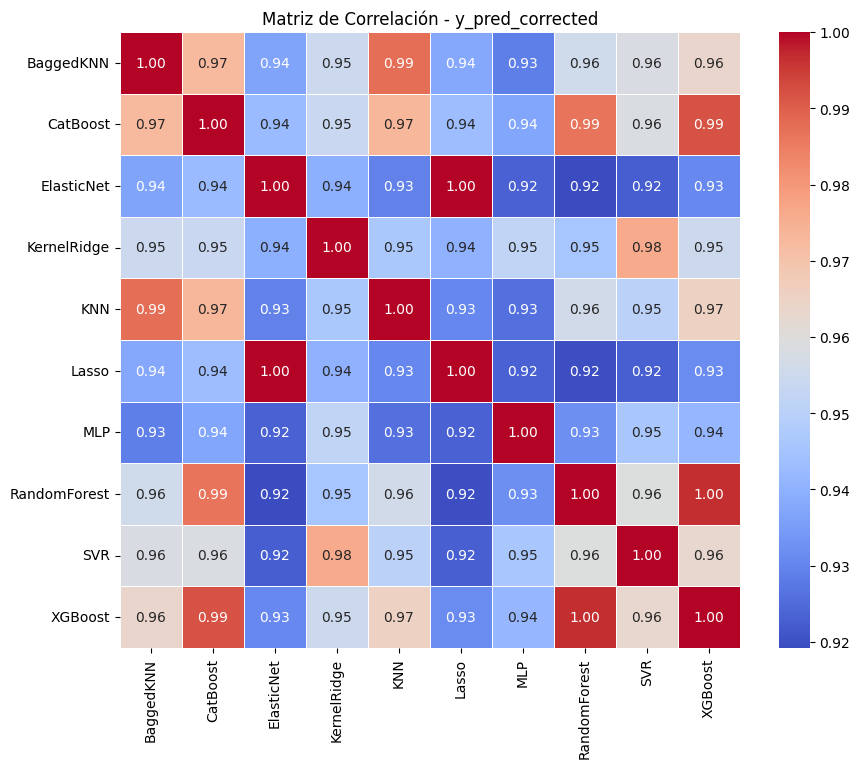


Matriz de correlación para GAP:

              BaggedKNN  CatBoost  ElasticNet  KernelRidge       KNN  \
BaggedKNN      1.000000  0.959683    0.902105     0.920114  0.980200   
CatBoost       0.959683  1.000000    0.909157     0.919273  0.957391   
ElasticNet     0.902105  0.909157    1.000000     0.897520  0.885591   
KernelRidge    0.920114  0.919273    0.897520     1.000000  0.908786   
KNN            0.980200  0.957391    0.885591     0.908786  1.000000   
Lasso          0.903727  0.910171    0.999690     0.898562  0.887046   
MLP            0.872276  0.885849    0.865515     0.916841  0.869420   
RandomForest   0.950592  0.990128    0.896897     0.917030  0.948533   
SVR            0.928102  0.930301    0.875815     0.962565  0.919956   
XGBoost        0.955462  0.991554    0.904749     0.921076  0.952927   

                 Lasso       MLP  RandomForest       SVR   XGBoost  
BaggedKNN     0.903727  0.872276      0.950592  0.928102  0.955462  
CatBoost      0.910171  0.885849   

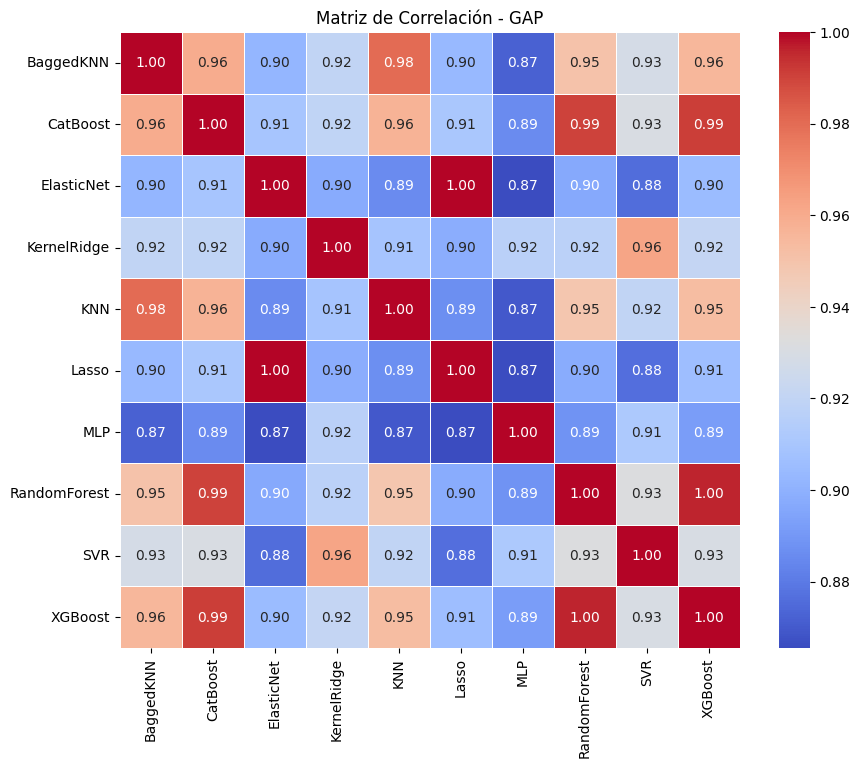


Matriz de correlación para GAP_corrected:

              BaggedKNN  CatBoost  ElasticNet  KernelRidge       KNN  \
BaggedKNN      1.000000  0.862720    0.676892     0.820466  0.929710   
CatBoost       0.862720  1.000000    0.693661     0.815491  0.847731   
ElasticNet     0.676892  0.693661    1.000000     0.743828  0.647419   
KernelRidge    0.820466  0.815491    0.743828     1.000000  0.778622   
KNN            0.929710  0.847731    0.647419     0.778622  1.000000   
Lasso          0.680009  0.694812    0.999080     0.746044  0.650225   
MLP            0.736599  0.770483    0.698331     0.831845  0.714983   
RandomForest   0.803669  0.932978    0.599548     0.761319  0.752193   
SVR            0.870651  0.877612    0.701921     0.920003  0.821382   
XGBoost        0.803318  0.932040    0.604088     0.775109  0.755045   

                 Lasso       MLP  RandomForest       SVR   XGBoost  
BaggedKNN     0.680009  0.736599      0.803669  0.870651  0.803318  
CatBoost      0.694812  0

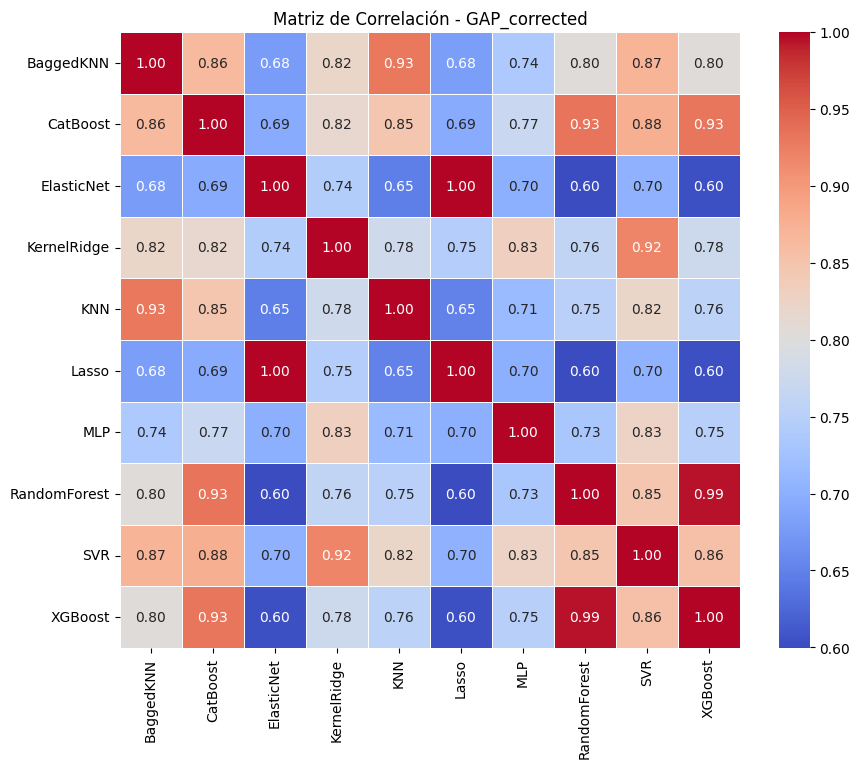

In [3]:
import pandas as pd

# Lista de nombres de modelos y sus DataFrames
modelos = {
    "BaggedKNN": results_df_BaggedKNN,
    "CatBoost": results_df_CatBoost,
    "ElasticNet": resultss_df_ElasticNet,
    "KernelRidge": results_df_KernelRidge,
    "KNN": results_df_KNN,
    "Lasso": results_df_Lasso,
    "MLP": results_df_MLP,
    "RandomForest": results_df_RandomForest,
    "SVR": results_df_SVR,
    "XGBoost": results_df_XGBoost
}

# Asegurar que todos los DataFrames estén ordenados por 'ID-unique'
for modelo in modelos:
    modelos[modelo] = modelos[modelo].sort_values(by="ID-unique").reset_index(drop=True)

# Variables de interés
columnas_interes = ["y_pred", "y_pred_corrected", "GAP", "GAP_corrected"]

# Crear un diccionario para almacenar los datos
data_corr = {}

# Extraer cada variable de cada modelo
for col in columnas_interes:
    data_corr[col] = pd.DataFrame({modelo: modelos[modelo][col] for modelo in modelos})

    # Calcular la correlación entre los modelos para esta variable
    corr_matrix = data_corr[col].corr()

    # Mostrar la matriz de correlación
    print(f"\nMatriz de correlación para {col}:\n")
    print(corr_matrix)

    # (Opcional) Graficar la matriz de correlación
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Matriz de Correlación - {col}")
    plt.show()
